# My First RC Network
For working with *'SLiCAP'* you need to import this module. In this script we also use the Python Computer Algebra System *'sympy'*. We import both modules in their own namespace:

In [1]:
import SLiCAP as sl
import sympy as sp

First, we need to initialize a *'SLiCAP'* project, this will compile the SLiCAP libraries, create a project directory structure, and create a project initialization file. For this you need the function *'initProject(\<project name\>)'*. Setting the keyword argument *'notebook=True'* disables the generation of a project html website, but displays all html output in your notebook. Project settings are stored in the *'SLiCAP.ini'* file in the project directory.

In [2]:
sl.initProject('My first RC network', notebook=True)

Compiling library: SLiCAP.lib.
Compiling library: SLiCAPmodels.lib.


In order to work with a circuit defined in a schematic, we been to convert it into a *SLiCAP circuit* object. Let us create a SLiCAP circuit object from the kicad schematic file *'myFirstRCnetwork.kicad_sch'* and assign it to the variable *'cir'*:

In [3]:
cir = sl.makeCircuit("kicad/myFirstRCnetwork/myFirstRCnetwork.kicad_sch")

Creating netlist of kicad/myFirstRCnetwork/myFirstRCnetwork.kicad_sch using KiCAD
Creating drawing-size SVG and PDF images of kicad/myFirstRCnetwork/myFirstRCnetwork.kicad_sch
Plotted to '/home/anton/SLiCAP/examples/myFirstRCnetwork/img/myFirstRCnetwork.svg'.
Done
Checking netlist: cir/myFirstRCnetwork.cir


## Circuit diagram
During the creation of the circuit object, SLiCAP saved an *'.svg'* image in the *'img/'* folder in the project directory. You can display it in your notebook using the *'img2html()'* function:

In [32]:
sl.img2html("myFirstRCnetwork.svg", width=300)

SLiCAP created a netlist of the kicad circuit.

In [5]:
sl.netlist2html("myFirstRCnetwork.cir")

The expanded netlist shows all the ellements and their attributes.

In [6]:
sl.elementData2html(cir)

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,0 out,,C,value,$C$,$1.592 \cdot 10^{-7}$
,,,,vinit,$0$,$0$
R1,out in,,R,value,$R$,$1000.0$
,,,,noisetemp,$0$,$0$
,,,,noiseflow,$0$,$0$
,,,,dcvar,$0$,$0$
,,,,dcvarlot,$0$,$0$
V1,in 0,,V,value,$V_{s}$,$V_{s}$
,,,,noise,$0$,$0$
,,,,dc,$0$,$0$


Below the parameters and parameter definitions found in the circuit.

In [7]:
sl.params2html(cir)

# Symbolic Matrix equation
Let us evaluate the symbolic MNA matrix equation and display it below.

In [8]:
MNA = sl.doMatrix(cir)
sl.matrices2html(MNA)

The variables in this equation are available in the variable 'MNA' that holds the result of the execution.
'MNA.Iv', 'MNA.M', and 'MNA.Dv' are the vector with independent variables, the MNA matrix, and the vector with dependent variables, respectively.

In [9]:
sl.eqn2html('I_v', MNA.Iv)

In [10]:
sl.eqn2html('M', MNA.M)

In [11]:
sl.eqn2html('D_v', MNA.Dv)

# Laplace transfer function of the network
Let us now evaluate the Laplace transfer function of this network (default = gain from signal source to detector).

In [12]:
gain = sl.doLaplace(cir)
sl.eqn2html('V_out/V_in', gain.laplace)

The parameters 'R' and 'C' stem from the circuit, while 's' is defined as the Laplace variable:

In [13]:
print(sl.ini.laplace)

s


# Frequency plots
SLiCAP has a lot of predefined plots. The results of a "doLaplace" analysis can graphically be represented with:

1. magnitude plots versus frequency
2. dB magnitude plots versus frequency
3. phase plots versus frequency
4. polar plot
5. (group) delay plots versus frequency

For plotting we need numeric values, hence we recursively subsitutute all parameter values given in the circuit.

In [14]:
numGain = sl.doLaplace(cir, pardefs="circuit", numeric=True)

Below the code for ploting the plots listed above. The graphic files are saved in the "img/" folder of the project folder.

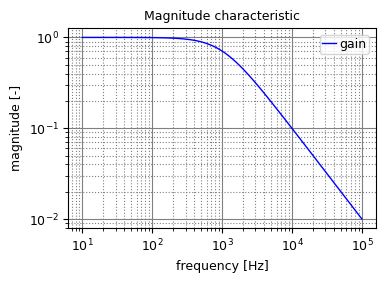

In [15]:
figMag = sl.plotSweep('RCmag', 'Magnitude characteristic', numGain, 10, '100k', 100, yUnits = '-', show = True)

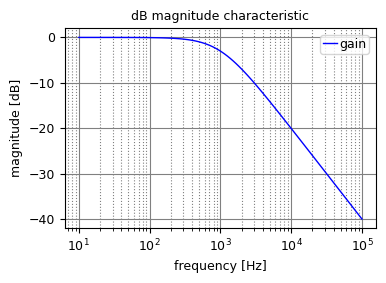

In [16]:
figdBmag = sl.plotSweep('RCdBmag', 'dB magnitude characteristic', numGain, 10, '100k', 100, funcType = 'dBmag', show = True)

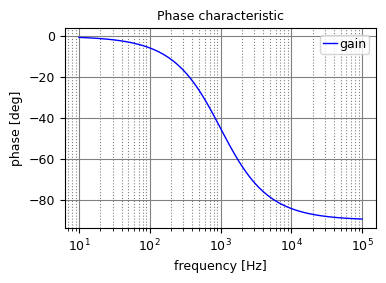

In [17]:
figPhase = sl.plotSweep('RCphase', 'Phase characteristic', numGain, 10, '100k', 100, funcType = 'phase', show = True)

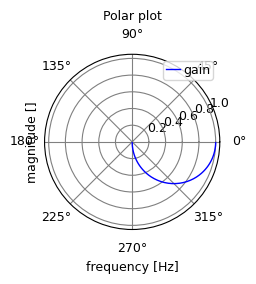

In [18]:
figPol = sl.plotSweep('RCpolar', 'Polar plot', numGain, 10, '100k', 100, axisType = 'polar', show = True)

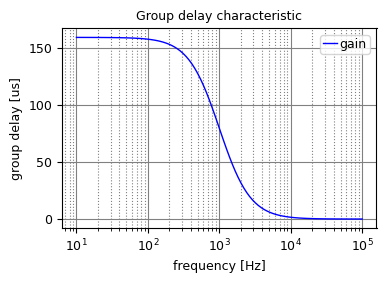

In [19]:
figDelay = sl.plotSweep('RCdelay', 'Group delay characteristic', numGain, 10, '100k', 100, yScale = 'u', funcType = 'delay', show=True)

# Pole-zero analysis
SLiCAP can perform symbolic and numeric pole-zero analysis. Symbolic analysis can only be performed for networks of limited order.
Below the instruction for symbolic analysis of gain, poles and zeros. The gain is defined as the ratio of the lowest order coefficients of 's' of the the numerator and the denominator of the Laplace transfer function.
By default, the results are displayed in 'Hz'. Internally, however, SLiCAP uses 'rad/s'.

In [20]:
pzGain_sym = sl.doPZ(cir)
sl.pz2html(pzGain_sym)

In [21]:
pzGain_sym = sl.doPZ(cir)
sl.pz2html(pzGain_sym)

Let us now obtain numeric results

In [22]:
pzGain = sl.doPZ(cir, pardefs="circuit", numeric=True)
sl.pz2html(pzGain)

pole,Re [Hz],Im [Hz],Mag [Hz],Q
p1,-1000.,0,1000.,
zero,Re [Hz],Im [Hz],Mag [Hz],Q


## Pole-zero plot
Let us also create a pole-zero plot:

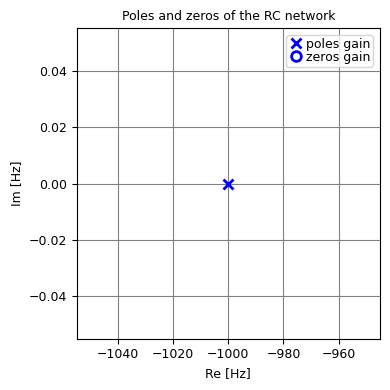

In [23]:
figPZ = sl.plotPZ('PZ', 'Poles and zeros of the RC network', pzGain, show = True)

# Time-domain analysis
With the instructions 'doImpulse' and 'doStep' SLiCAP calculates the unit impulse response and the unit step response of a network, respctively. These responses are obtained from the Inverse Laplace Transform of the transfer function.
Below we show how to calculate and plot the unit step response.

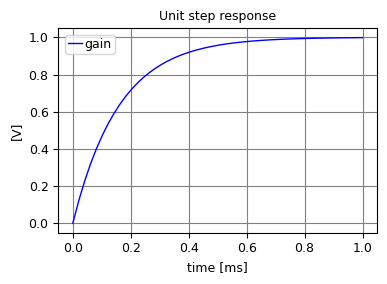

In [24]:
numStep = sl.doStep(cir, pardefs="circuit", numeric=True)
figStep = sl.plotSweep('step', 'Unit step response', numStep, 0, 1, 50, sweepScale='m', show = True)

# Setting-up and solving design equations
SLiCAP is developed for setting up and solving circuit design equations.elow, we will determine circuit element values to achieve a settling time $\tau_s$ to $n$ bit.

The procedure is as follows:
1. Get a symbolic expression of the output voltage as a function of time
2. Get a symbolic expression for the settling error $\delta_t$ as function of time
3. Find the settling $\tau_s$ by solving: $\delta_t = 2^{-n}$
4. Find the design equations for  the component values:
   a. Write the resistance $R_{R1}$ as a function of $n$, $\tau_s$ and $C$
   b. Write the capacitance $C_{C1}$ as a function of $n$, $\tau_s$ and $R$

Step 1:

In [25]:
symStep = sl.doStep(cir).stepResp
a_t     = sp.Symbol('a_t')
sl.eqn2html(a_t, symStep)

Step 2:

In [26]:
settlingError = 1 - symStep
epsilon_t     = sp.Symbol('epsilon_t')
sl.eqn2html(epsilon_t, settlingError)

Step 3: Find an expression for the n-bit settling time.

In [27]:
n, t, tau_s, R, C = sp.symbols('n, t, tau_s, R, C', positive = True)
settlingError     = sl.assumePosParams(settlingError)
settlingTime      = sp.solve(settlingError - 2**(-n), t)[0]
sl.eqn2html(tau_s, settlingTime)

Step 4a: The design equation for $R$

In [28]:
RR1 = sp.solve(settlingTime - tau_s, R)[0]
sl.eqn2html(R, RR1)

Step 4b: The design equation for $C$

In [29]:
CC1 = sp.solve(settlingTime - tau_s, C)[0]
sl.eqn2html(C, CC1)

## Numeric example
We will determine $R$ for the case in which we need 10 bit settling within 100ns with a capacitance $C$=10pF:

In [30]:
Rvalue = sp.N(RR1.subs({tau_s: 100e-9, n: 10, C: 1e-11}))
sl.eqn2html(R, Rvalue)